In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "/content/block3.csv"
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])

In [3]:
bitcoin_train_df = bitcoin_df.iloc[:361]
bitcoin_train_df

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
356,2021-11-30,57828.45
357,2021-12-01,57025.79
358,2021-12-02,57229.76
359,2021-12-03,56508.48


In [4]:
bitcoin_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     361 non-null    object 
 1   price   361 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
#시계열은 날짜로 인식시켜야하기떄문에
#날짜로 인식시키기위해서 바꿔준다.

In [6]:
bitcoin_train_df['day'] = pd.to_datetime(bitcoin_train_df['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
bitcoin_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     361 non-null    datetime64[ns]
 1   price   361 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [8]:
bitcoin_train_df.set_index('day', inplace=True) #렘에서만 바꾸닌 비파괴 inplace= True 해줘야 비파괴 아님

In [9]:
bitcoin_train_df

,price
day,
2020-12-09,18318.87
2020-12-10,18554.15
2020-12-11,18247.76
2020-12-12,18029.36
2020-12-13,18803.44
...,...
2021-11-30,57828.45
2021-12-01,57025.79
2021-12-02,57229.76


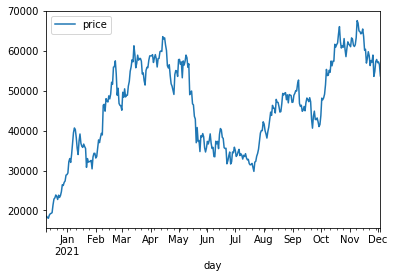

In [10]:
bitcoin_train_df.plot()
plt.show()

In [11]:
### ARIMA 모델 = AR + I +MA
### AR = AutoRegression , 이전데이터들에서 학습한 내용을 가지고 예측
### I : Defference, 차이
### MA = Moving Averge ,이전데이터들의 오차를 반영해서 예측


In [12]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
bitcoin_train_df

,price
day,
2020-12-09,18318.87
2020-12-10,18554.15
2020-12-11,18247.76
2020-12-12,18029.36
2020-12-13,18803.44
...,...
2021-11-30,57828.45
2021-12-01,57025.79
2021-12-02,57229.76


In [14]:
model = ARIMA(bitcoin_train_df, order=(2,1,2)) # order(안에 파라메터는 순서대로 AR ,I ,MA)
model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [15]:
model_fit=model.fit(trend='c', full_output = True, disp =True)
model_fit

In [16]:
model_fit.summary()
# P>|z|  P = 가능성 probabiliy
# P값의 0은 내부적으로 문제가없다 ar ,ma를 써도된다는 의미 (0.05의 기준으로)
# p값을 보고 써도되는지 안되는지의 판단 유무를 보기떄문에 보고서를볼떄 p값을 보자

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                  360
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3225.913
Method:                       css-mle   S.D. of innovations           1882.730
Date:                Fri, 10 Dec 2021   AIC                           6463.825
Time:                        06:57:08   BIC                           6487.142
Sample:                    12-10-2020   HQIC                          6473.096
                         - 12-04-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.7901     99.496      0.802      0.423    -115.219     274.799
ar.L1.D.price     0.9185      0.040     23.091      0.000       0.841       0.996
ar.L2.D.price    -0.9440      0.032    -29.400      0.000      -1.007      -0.881
ma.L1.D.price    -0.9573      0.025    -38.376      0.000      -1.006      -0.908
ma.L2.D.price     0.9855      0.026     38.263      0.000       0.935       1.036
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4865           -0.9070j            1.0292           -0.1716
AR.2            0.4865           +0.9070j            1.0292            0.1716
MA.1            0.4857           -0.8825j            1.0073           -0.1699
MA.2            0.4857           +0.8825j            1.0073            0.1699
-----------------------------------------------------------------------------
"""

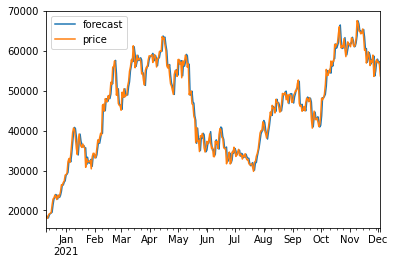

In [17]:
# 학습 데이터에 대한 예측 결과
fig = model_fit.plot_predict()
#파란색이 예측값 노란색이 실제값

In [18]:
forcast_data = model_fit.forecast(steps =5)
forcast_data
# 이값은 예측한값

(array([53859.90839342, 53891.33862905, 53864.14563435, 53891.32506776,
        54023.78371803]),
 array([1882.73041766, 2611.43093677, 3183.52110652, 3707.37515166,
        4194.6159268 ]),
 array([[50169.8245822 , 57549.99220464],
        [48773.02804487, 59009.64921322],
        [47624.55892156, 60103.73234715],
        [46625.00329334, 61157.64684219],
        [45802.48757252, 62245.07986355]]))

In [19]:
bitcoin_test_df = bitcoin_df[361:]
bitcoin_test_df

,day,price
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41
365,2021-12-09,50511.12


In [20]:
pred_y =forcast_data[0]
pred_y

array([53859.90839342, 53891.33862905, 53864.14563435, 53891.32506776,
       54023.78371803])

In [21]:
pred_y=pred_y.tolist()

In [22]:
bitcoin_test_df.price

361    49253.86
362    49380.43
363    50564.63
364    50645.41
365    50511.12
Name: price, dtype: float64

In [23]:
bitcoin_test_df.price.values

array([49253.86, 49380.43, 50564.63, 50645.41, 50511.12])

In [24]:
test_y=bitcoin_test_df.price.values.tolist()

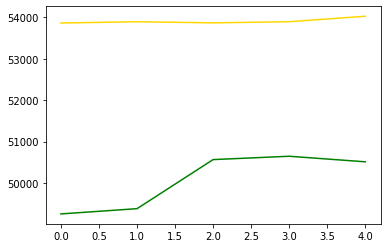

In [25]:
#위코드는 그래프그리기위해 리스트로 변환하는 코드 그래프 그리기위해서는 리스트가필요함
plt.plot (pred_y, color='gold')
plt.plot (test_y, color='green')


In [26]:
forcast_data[2] # 최저[0] ,최고[1] => 그래프로!

array([[50169.8245822 , 57549.99220464],
       [48773.02804487, 59009.64921322],
       [47624.55892156, 60103.73234715],
       [46625.00329334, 61157.64684219],
       [45802.48757252, 62245.07986355]])

In [27]:
min_f=forcast_data[0].tolist()
max_f=forcast_data[1].tolist()

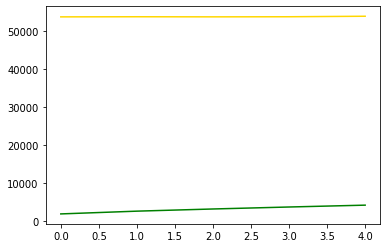

In [28]:
plt.plot (min_f, color='gold')
plt.plot (max_f, color='green')

In [30]:
file_path = "/content/market-price.csv"
df = pd.read_csv(file_path, names = ['day', 'price'])

In [33]:
df

,day,price
0,2018-12-11 00:00:00,3472.98
1,2018-12-12 00:00:00,3407.28
2,2018-12-13 00:00:00,3487.73
3,2018-12-14 00:00:00,3308.11
4,2018-12-15 00:00:00,3242.42
...,...,...
1091,2021-12-06 00:00:00,49380.43
1092,2021-12-07 00:00:00,50564.63
1093,2021-12-08 00:00:00,50645.41
1094,2021-12-09 00:00:00,50511.12


In [34]:
df['day']=pd.to_datetime(df['day'])
df.index = df['day']
df.set_index('day', inplace=True)
df

,price
day,
2018-12-11,3472.98
2018-12-12,3407.28
2018-12-13,3487.73
2018-12-14,3308.11
2018-12-15,3242.42
...,...
2021-12-06,49380.43
2021-12-07,50564.63
2021-12-08,50645.41


In [35]:
df_train=df.iloc[:887]
df_train

,price
day,
2018-12-11,3472.98
2018-12-12,3407.28
2018-12-13,3487.73
2018-12-14,3308.11
2018-12-15,3242.42
...,...
2021-05-11,55883.50
2021-05-12,56750.00
2021-05-13,49007.09


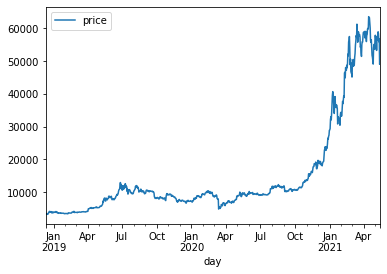

In [36]:
df_train.plot()
plt.show()

In [44]:
forecast_data2 = model_fit.forecast(steps=5) 

df_test = df[887:]
df_test

,price
day,
2021-05-16,46736.58
2021-05-17,46441.64
2021-05-18,43596.24
2021-05-19,42912.19
2021-05-20,36964.27
...,...
2021-12-06,49380.43
2021-12-07,50564.63
2021-12-08,50645.41


In [45]:
pred_y = forecast_data2[0].tolist()
test_y = df_test.price.values.tolist()

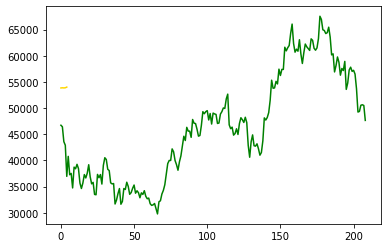

In [46]:
plt.plot (pred_y, color='gold')
plt.plot (test_y, color='green')

In [47]:
min_f=forecast_data2[0].tolist()
max_f=forecast_data2[1].tolist()

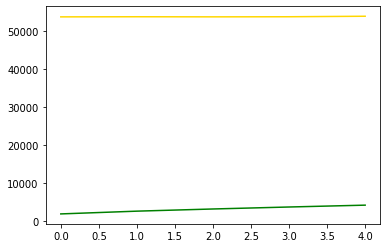

In [48]:
plt.plot (min_f, color='gold')
plt.plot (max_f, color='green')

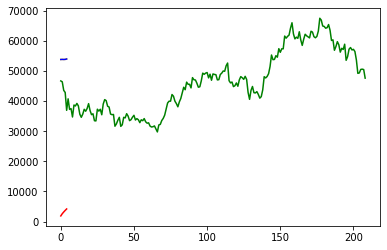

In [49]:
plt.plot (pred_y, color='gold')
plt.plot (test_y, color='green')
plt.plot (min_f, color='blue')
plt.plot (max_f, color='red')

In [43]:
### Additive 모델 = ARIMA + 기간의 trend(경향성) : fackbook(fb) 

In [50]:
from fbprophet import Prophet

file_path = "/content/block3.csv"
bitcoin_df = pd.read_csv(file_path, names = ['ds', 'y'])
bitcoin_df

,ds,y
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41


In [51]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(bitcoin_df)

In [52]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
366,2021-12-10,50512.869646,48214.676870,52725.154240
367,2021-12-11,51007.566222,48736.214791,53282.740299
368,2021-12-12,51222.189345,48970.903272,53479.274486
369,2021-12-13,51556.521793,49112.634155,53956.937854
370,2021-12-14,52161.984803,49659.333248,54663.201532


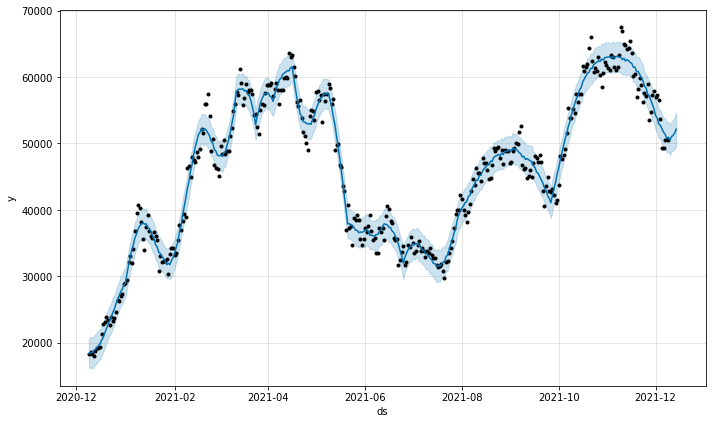

In [53]:
fig1 = prophet.plot(forecast_data)

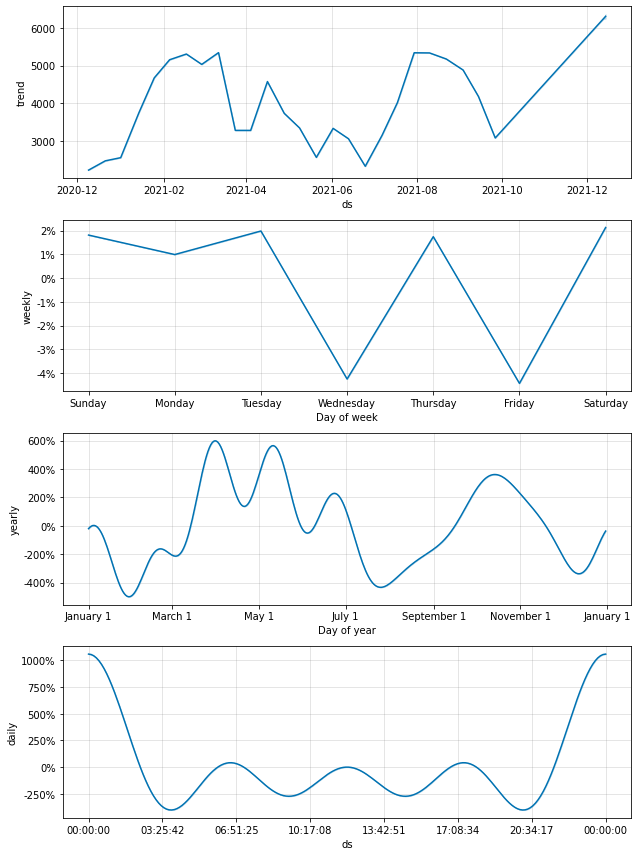

In [54]:
fig2 = prophet.plot_components(forecast_data)

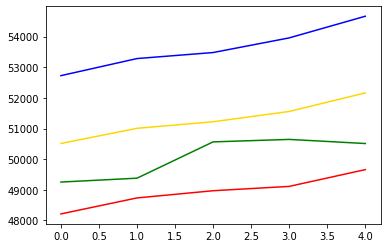

In [55]:
bitcoin_test_df = bitcoin_df[361:]

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_y = forecast_data.yhat.values[-5:]

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = bitcoin_test_df.y.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-5:]
# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

In [56]:
# 상한가 설정
bitcoin_df['cap'] = 65000

# 상한가 적용을 위한 파라미터를 다음과 같이 설정
prophet = Prophet(seasonality_mode = 'multiplicative',
                 growth = 'logistic',
                 yearly_seasonality = True,
                 weekly_seasonality = True, 
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(bitcoin_df)

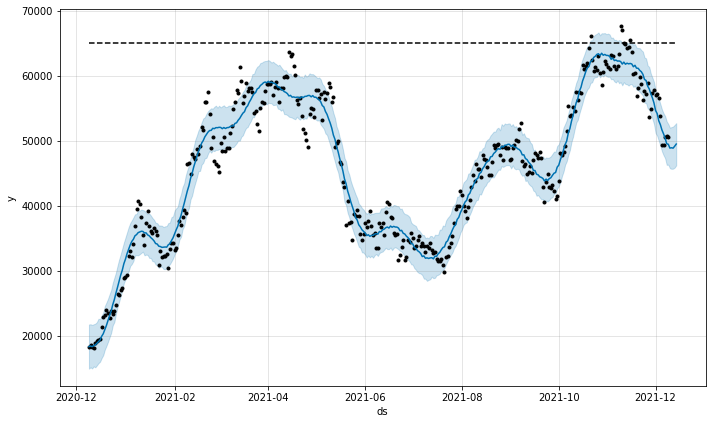

In [57]:
# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

# 상한가 설정
future_data['cap'] = 65000
forecast_data = prophet.predict(future_data)
fig = prophet.plot(forecast_data)

In [58]:
bitcoin_df = pd.read_csv(file_path, names = ['ds','y'])
bitcoin_df.loc[bitcoin_df['y'] > 63000, 'y'] = None

# prophet 모델 학습
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                 weekly_seasonality = True,
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(bitcoin_df)

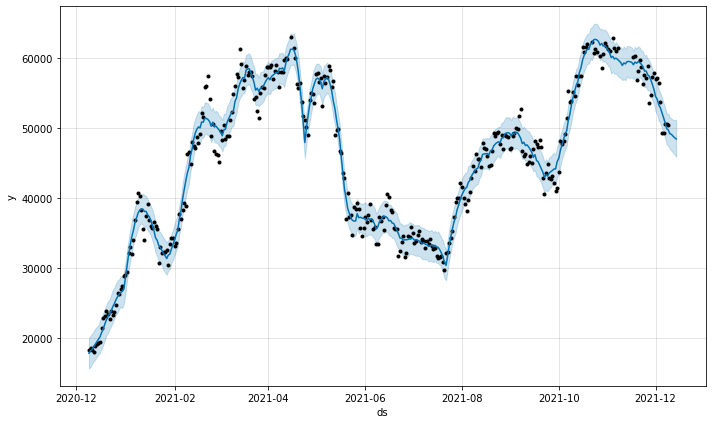

In [59]:
# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

forecast_data = prophet.predict(future_data)
fig = prophet.plot(forecast_data)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

1282.2278397994676
